# Introduction:
* Group 0: Team 2
* We wanted to determine the best neighborhood in Pittsburgh. We looked at the available datasets and the most dangerous things to us were crime(marked by arrests) and fires. In order for a neighborhood to be the best, it should also be one of, if not the safest. So we said that the best neighborhood would be the one with the least amount of arrests and fires. However, we realized that almost certainly the neighborhood with the highest population was bound to be the worst. Accordingly, we used the population by neighborhood dataset in order to develop a ratio of fires and arrests per however many people.
* We also included the neighborhood dataset in order to verify that we had only official neighborhoods. We started with 98 neighborhoods in the arrests datsets, and then, when merging all the datasets, we ended with 89 total neighborhoods.


# Datasets: 

* Pittsburgh Police Arrest Data
* Fire Incidents
* total population
* Neighborhoods


In [1]:
import pandas as pd

Here we just read in the arrests file, and sort it by the least arrests to the most arrests. In order to prepare for the merging we made Neighborhood a column rather than an index, and made the column names simpler.

In [21]:
arrests = pd.read_csv("arrests.csv")
arrest_count = arrests.groupby("INCIDENTNEIGHBORHOOD").count()["PK"]
arrest_count = arrest_count.sort_values(ascending = True)
arrest_count_df = arrest_count.to_frame()
arrest_count_df = arrest_count_df.reset_index(level = 'INCIDENTNEIGHBORHOOD')
arrest_count_df.columns=["Neighborhood", "arrests"]

arrest_count_df.head(10)

,Neighborhood,arrests
0,Mt. Oliver Neighborhood,2
1,Troy Hill-Herrs Island,6
2,Mt. Oliver Boro,12
3,Ridgemont,13
4,Regent Square,19
5,Swisshelm Park,20
6,New Homestead,22
7,Chartiers City,23
8,Central Northside,23
9,East Carnegie,27


Here we complete the same steps as with the arrests dataset, but for fires per neighborhood

In [23]:
fire = pd.read_csv("fire.csv")
fire_count = fire.groupby("neighborhood").count()["call_no"]
fire_count = fire_count.sort_values(ascending = True)
fire_count_df = fire_count.to_frame()
fire_count_df = fire_count_df.reset_index(level = 'neighborhood')
fire_count_df.columns=["Neighborhood", "fires"]
fire_count_df.head(10)

,Neighborhood,fires
0,Mount Oliver Borough,4
1,Regent Square,6
2,East Carnegie,6
3,Mt. Oliver,7
4,Arlington Heights,9
5,Oakwood,10
6,Hays,11
7,Chartiers City,11
8,Swisshelm Park,11
9,St. Clair,11


In [6]:
population = pd.read_csv("population.csv")
population_sorted = population.sort_values("Neighborhood")
population_sorted.columns=["Neighborhood", "id", "population", "Margin of error"]
population_sorted.head(10)

,Neighborhood,id,population,Margin of error
0,Allegheny Center,1,1411,196.000000
1,Allegheny West,2,343,96.000000
2,Allentown,3,2558,449.773276
3,Arlington,4,1852,348.188168
4,Arlington Heights,5,272,126.000000
5,Banksville,6,3858,581.107563
6,Bedford Dwellings,7,1349,180.000000
7,Beechview,8,8078,719.658252
8,Beltzhoover,9,1702,343.072879
9,Bloomfield,10,8669,491.348145


In [9]:
neighborhood_series = pd.Series(population_sorted["Neighborhood"])
neighborhood_series
neighborhood_series_df = neighborhood_series.to_frame()

Here we begin the merging process, first combining the population and neighborhood dataframes, then the combined dataframe and the fire dataframe, and then finally adding the arrests dataframe to complete the combination.

In [10]:
combined = pd.merge(population_sorted,
                   neighborhood_series_df,
                   on = 'Neighborhood'
                   )
combined1 = pd.merge(combined,
                     fire_count_df,
                     on = "Neighborhood"
                     )
combined2 = pd.merge(combined1,
                     arrest_count_df,
                     on = "Neighborhood"
                     )

This is the creation of a list of incident scores in a list called 'average'. It remains in the same order of the last dataframe for easy entry into the new dataframe, called combined2.

In [11]:
average = []
thing = len(combined2)
for index, row in combined2.iterrows():
    average.append( (row["arrests"]+row["fires"])/row["population"] )
combined2["incident score"] = average


Lastly, we sort the combined dataframe, make sure the names of each column are readable and understandable, and reset the index to be the neighbrohoods themselves, thereby cleaning up the look of the dataframe.

In [14]:
final = combined2.sort_values(ascending = True, by = "incident score")
final = final[['Neighborhood', 'population', 'fires', 'arrests', 'incident score']]
final = final.set_index(['Neighborhood'])
final

,population,fires,arrests,incident score
Neighborhood,,,,
Squirrel Hill North,11336,96,151,0.021789
Swisshelm Park,1345,11,20,0.023048
Regent Square,1033,6,19,0.024201
North Oakland,9602,92,223,0.032806
Stanton Heights,4761,43,115,0.033186
Squirrel Hill South,16042,178,439,0.038462
Westwood,3537,21,119,0.039582
Central Northside,2892,94,23,0.040456
Lincoln Place,3499,44,101,0.041440


Below is a bar graph depicting the arrests per neighborhood, with Mt Oliver Neighborhood having the fewest arrests and the Central Business District having the greatest number of arrests.

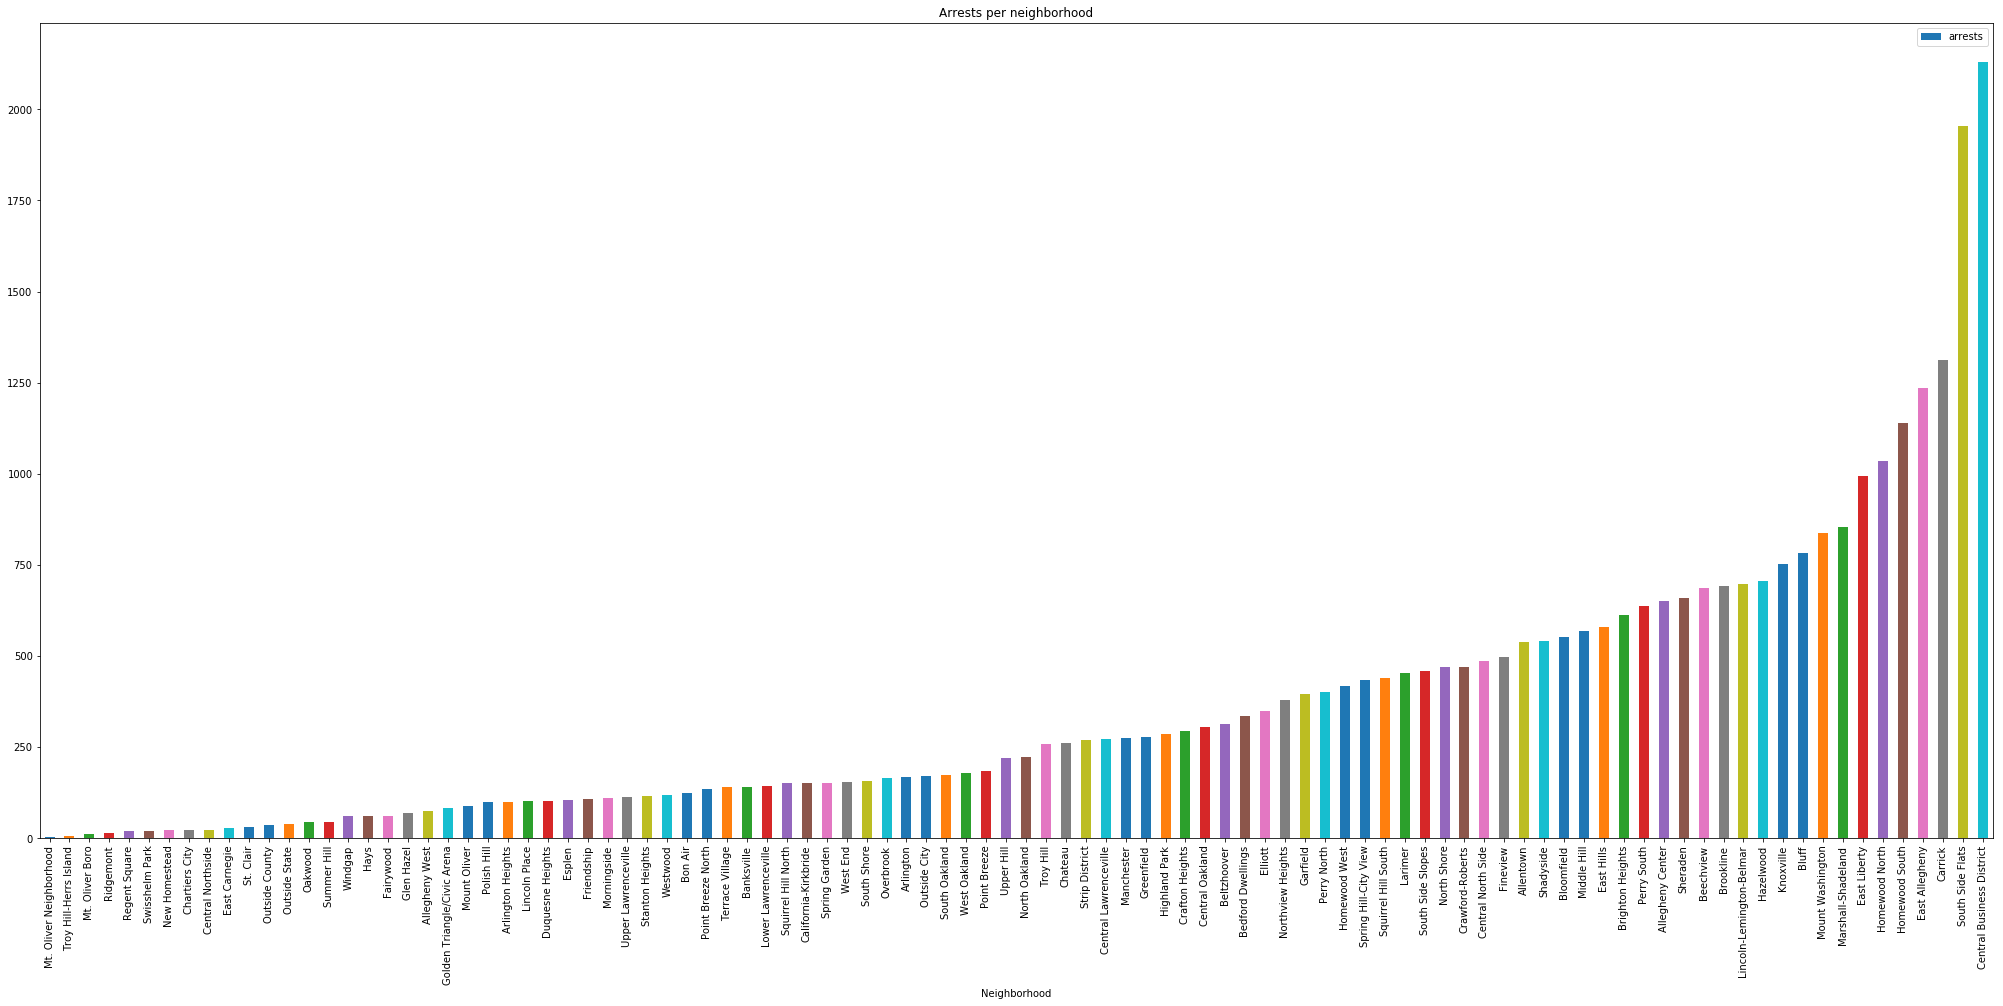

In [17]:
arrest_count_df.plot(kind = 'bar', figsize = (35, 15), title = 'Arrests per neighborhood', x="Neighborhood", y="arrests")

Similar to the arrests per neighborhood graph, below is a fires per neighborhood bar graph. As can be seen, Mount Oliver Borough has the fewest number of fires and Carrick has the highest.

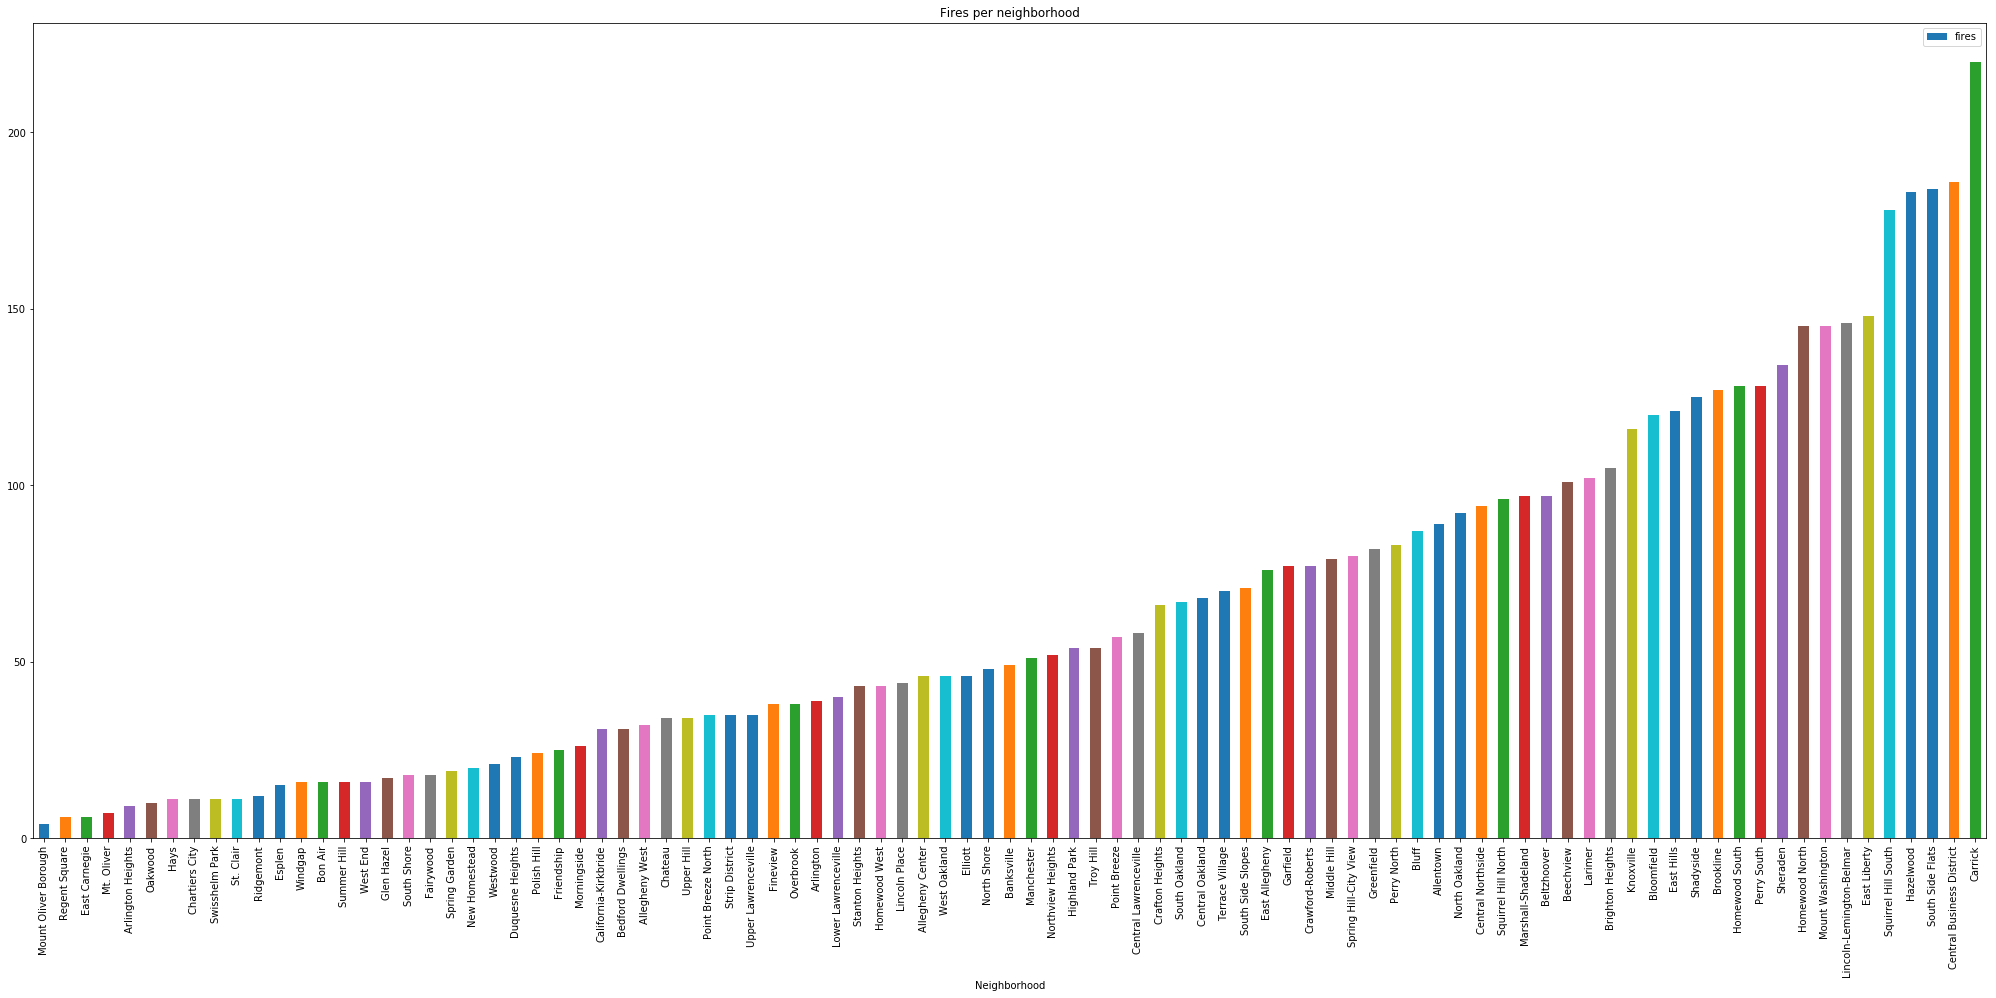

In [16]:
fire_count_df.plot(kind = 'bar', figsize = (35, 15), title = 'Fires per neighborhood', x="Neighborhood", y="fires")

This graph is a simplification of the real one which depicts the incident score per neighborhood. We used the logarithm of each score in order to make the graph more readable for the user due to Chateau being such an extreme outlier.

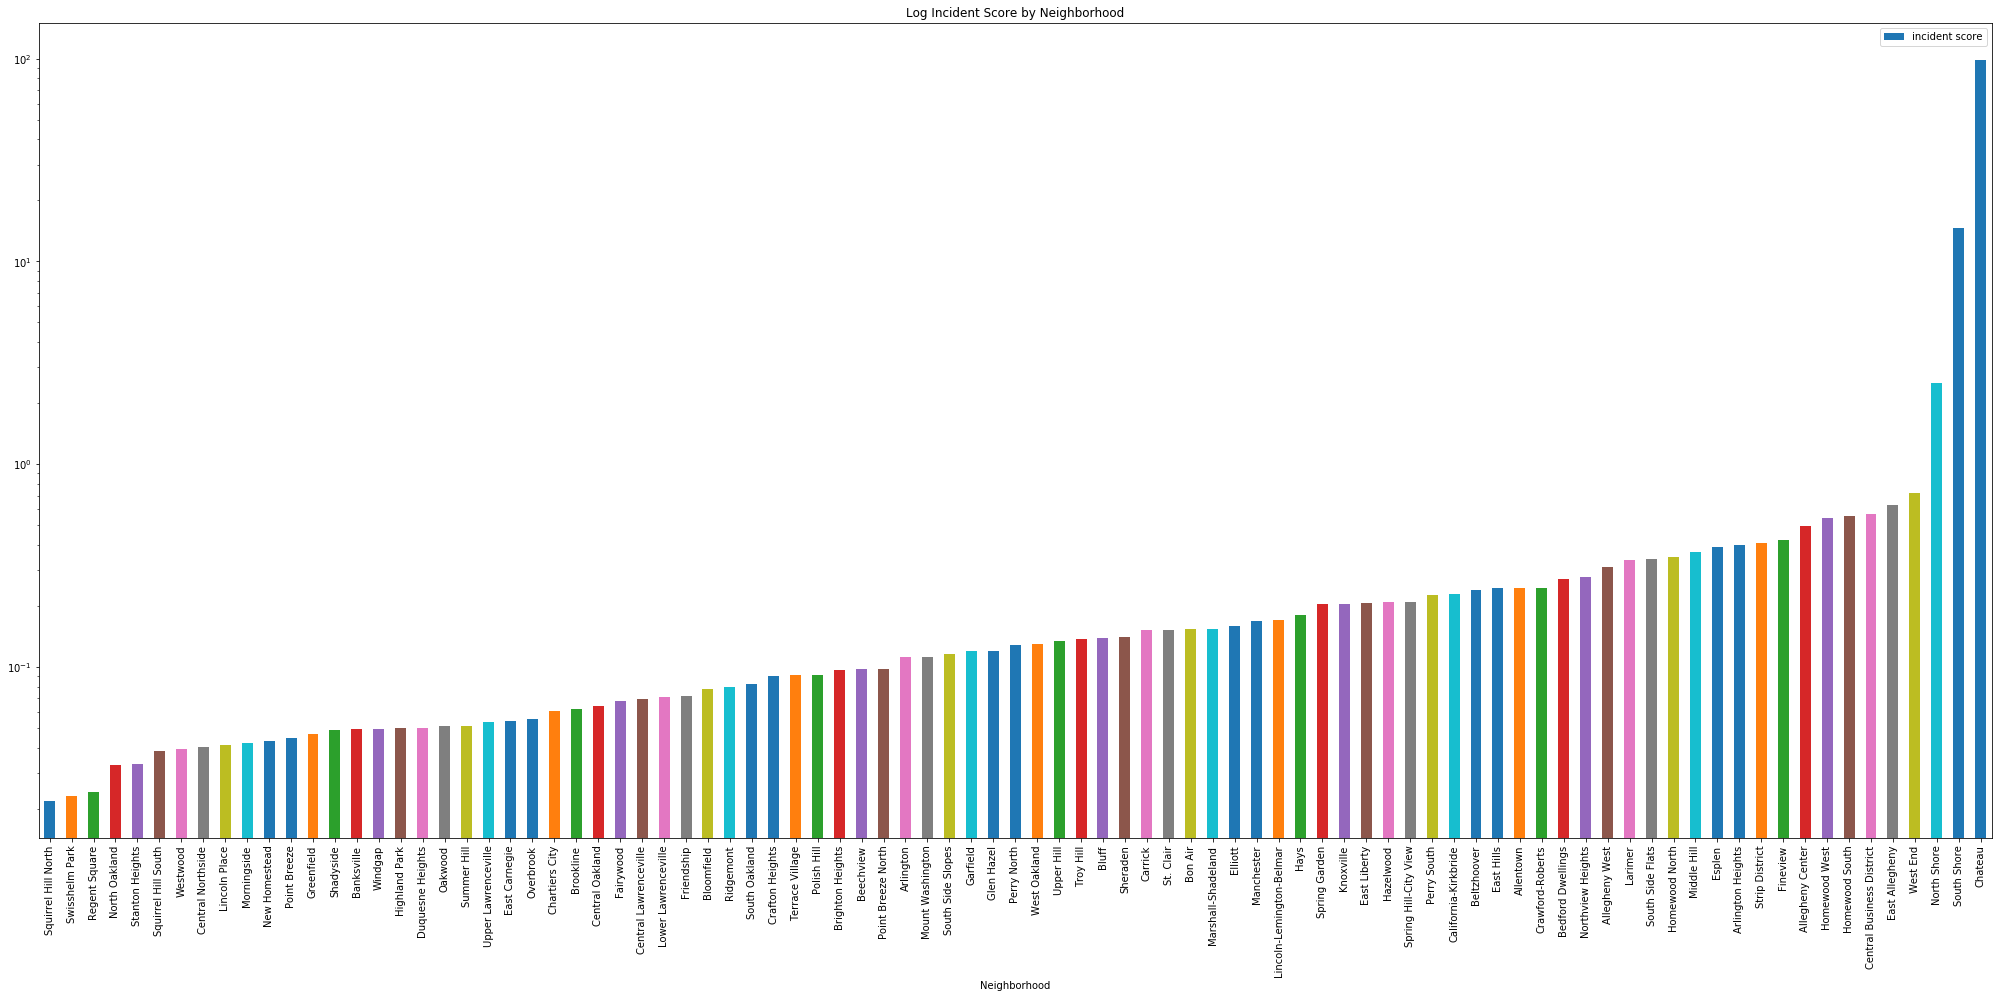

In [18]:
final.plot(kind = 'bar', figsize = (35, 15), title = 'Log Incident Score by Neighborhood', y='incident score', logy=True)

These are the fifteen safest/best neighborhoods based on our metrics, with the top three being relatively close to one another.

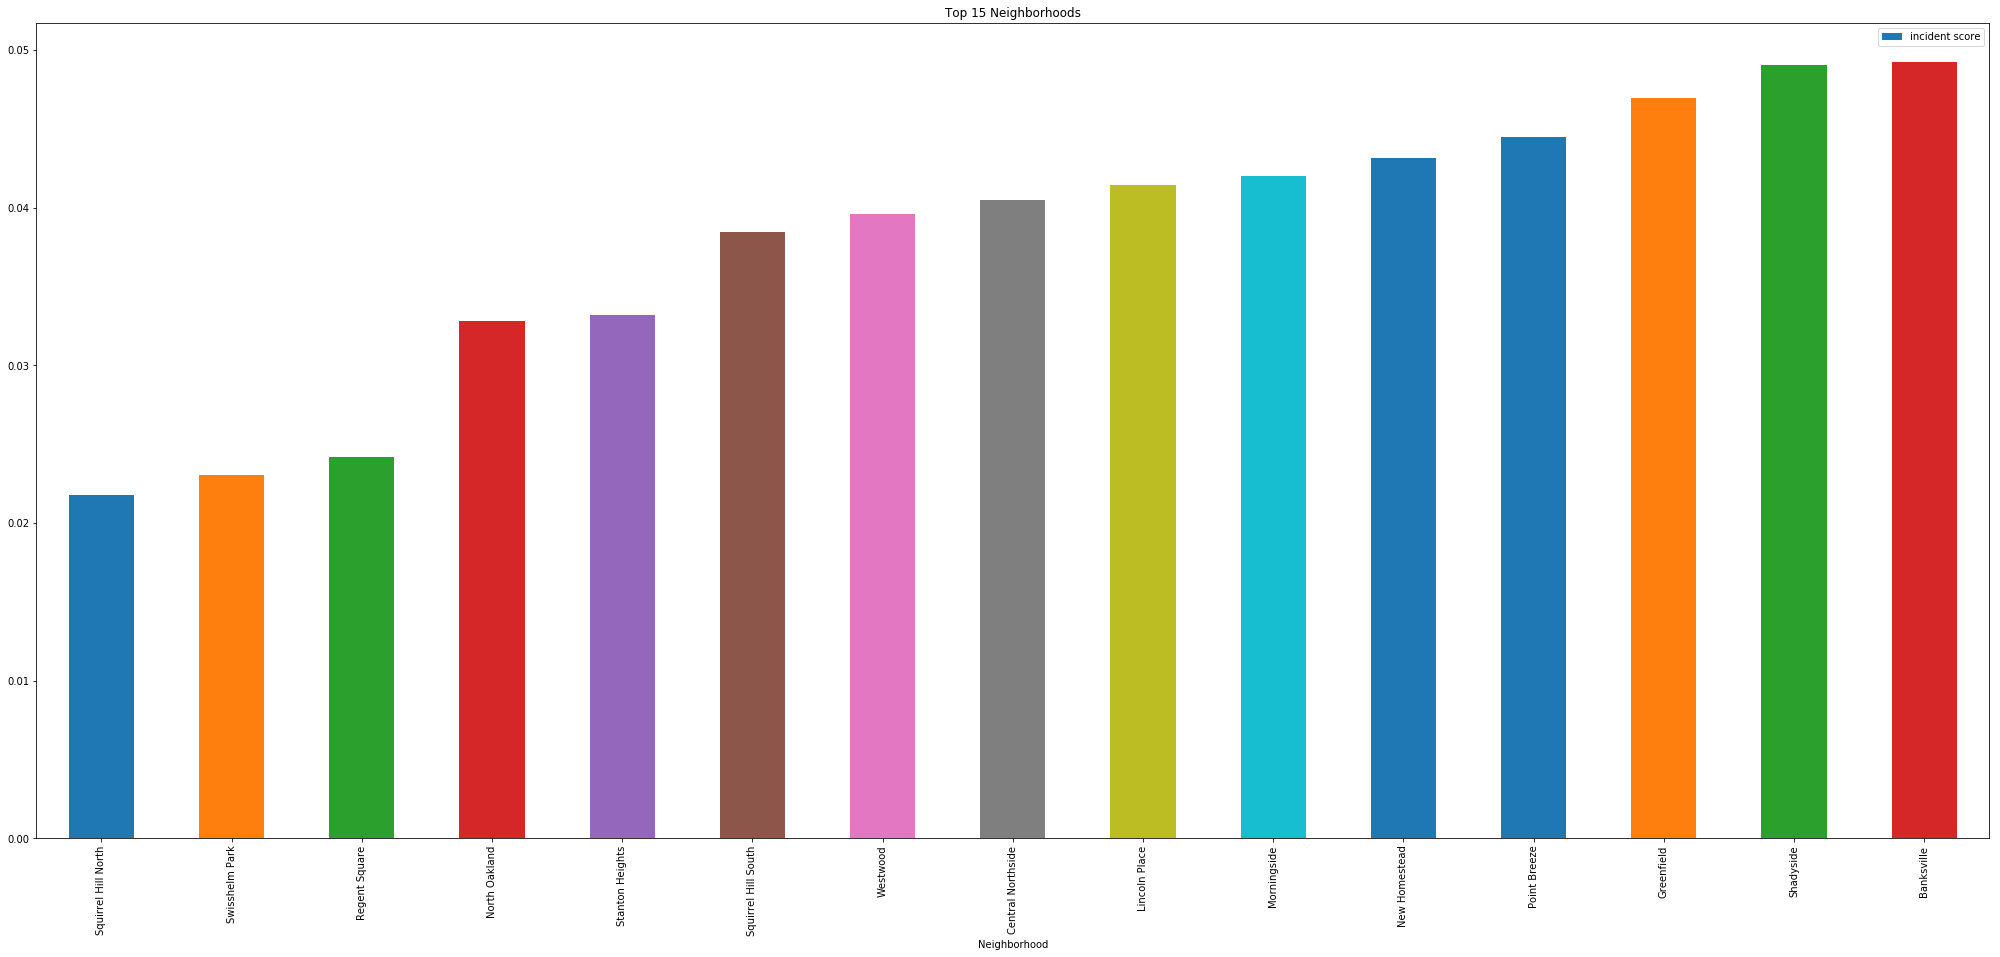

In [19]:
final.head(15).plot(kind = 'bar', figsize = (35, 15), title = 'Top 15 Neighborhoods', y='incident score')

# Best Neighborhood: Squirrel Hill North!

# Conclusion:
* Ari:

* James: I am not from the city of Pittsburgh, and so I am still exploring, but I have taken a couple of buses through Squirrel Hill North and I cannot really argue with the conclusion. I didn't so much find the results surprising. Although Chateau's incident score was so incredibly high it was bound to be so considering it's extremely low population of 3. Overall, Oakland is probably my favorite neighborhood since it houses my favorite university in the University of Pittsburgh. 

* Selver: 